In [179]:
import ROOT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from utils import to_data_frame
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
%jsroot off
canvas = ROOT.TCanvas("canvas", "canvas", 0, 0, 1500, 800);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [163]:
sns.set_theme(rc={'figure.figsize':(16.7,8.27)})
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [174]:
# filename = "/lustre/r3b/ywang/calibration/s515/run49x/millepede/cal.par.root"
filename = "/lustre/r3b/ywang/archive/millepede/cal.par.millepede.070724.root"
root_file = ROOT.TFile(filename, "read")
data_frame_pede = to_data_frame(root_file, 0)
data_frame_hist = to_data_frame(root_file, -1)

filename_old = "/lustre/r3b/ywang/archive/millepede/cal.par.current.070724.root"
root_file_old = ROOT.TFile(filename_old, "read")
data_frame_current = to_data_frame(root_file_old, 0)
data_frame_current["effective_speed"] *= -2

size of module pars: 1300
size of module pars: 1300
size of module pars: 1300


In [176]:
data_frame_pede["version"] = "millepede"
data_frame_hist["version"] = "pre"
data_frame_current["version"] = "current"
data_frame = pd.concat([data_frame_hist, data_frame_pede, data_frame_current], ignore_index=True)

Text(0.5, 0, 'bar number')

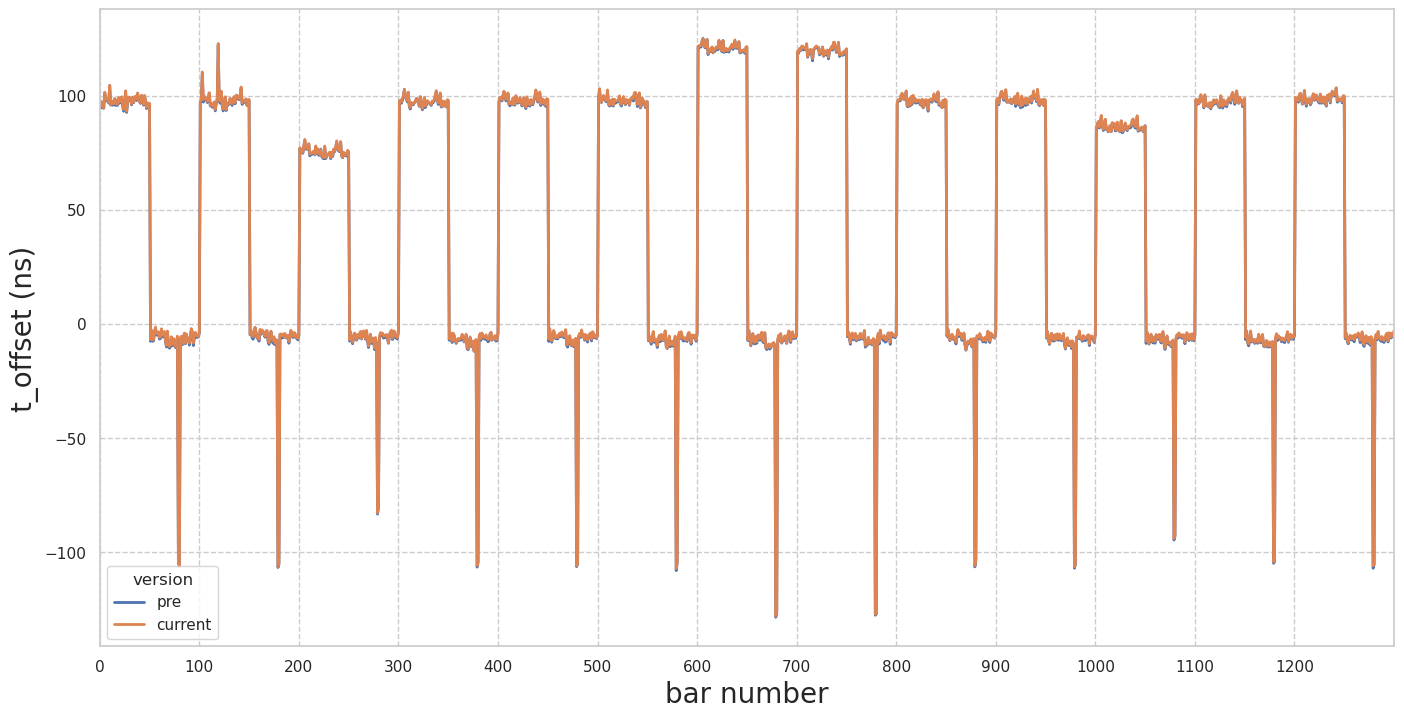

In [171]:
# g = sns.lineplot(data = data_frame, x = "bar_id", y = "t_diff", hue = "version", linewidth = 1)
g = sns.lineplot(data = data_frame[(data_frame["version"] == "pre") | (data_frame["version"] == "current")], x = "bar_id", y = "t_diff", linewidth = 2, hue = "version")
x_min = 0
x_max = 1300
g.set(xlim = (x_min, x_max), xticks = (range(x_min, x_max, 100)));
g.set_ylabel("t_offset (ns)", fontsize = 20)
g.set_xlabel("bar number", fontsize = 20)

Text(0.5, 0, 'bar number')

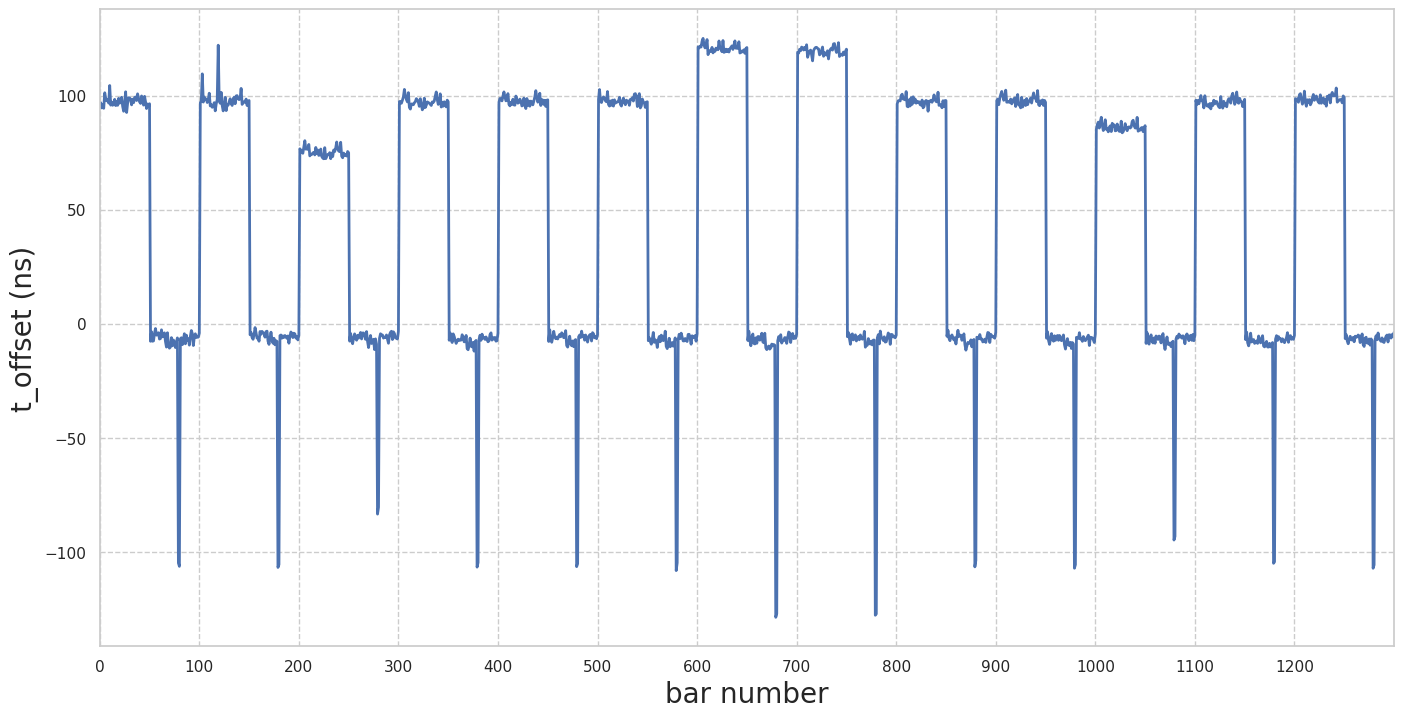

In [164]:
# g = sns.lineplot(data = data_frame, x = "bar_id", y = "t_diff", hue = "version", linewidth = 1)
g = sns.lineplot(data = data_frame_hist, x = "bar_id", y = "t_diff", linewidth = 2)
x_min = 0
x_max = 1300
g.set(xlim = (x_min, x_max), xticks = (range(x_min, x_max, 100)));
g.set_ylabel("t_offset (ns)", fontsize = 20)
g.set_xlabel("bar number", fontsize = 20)

[None]

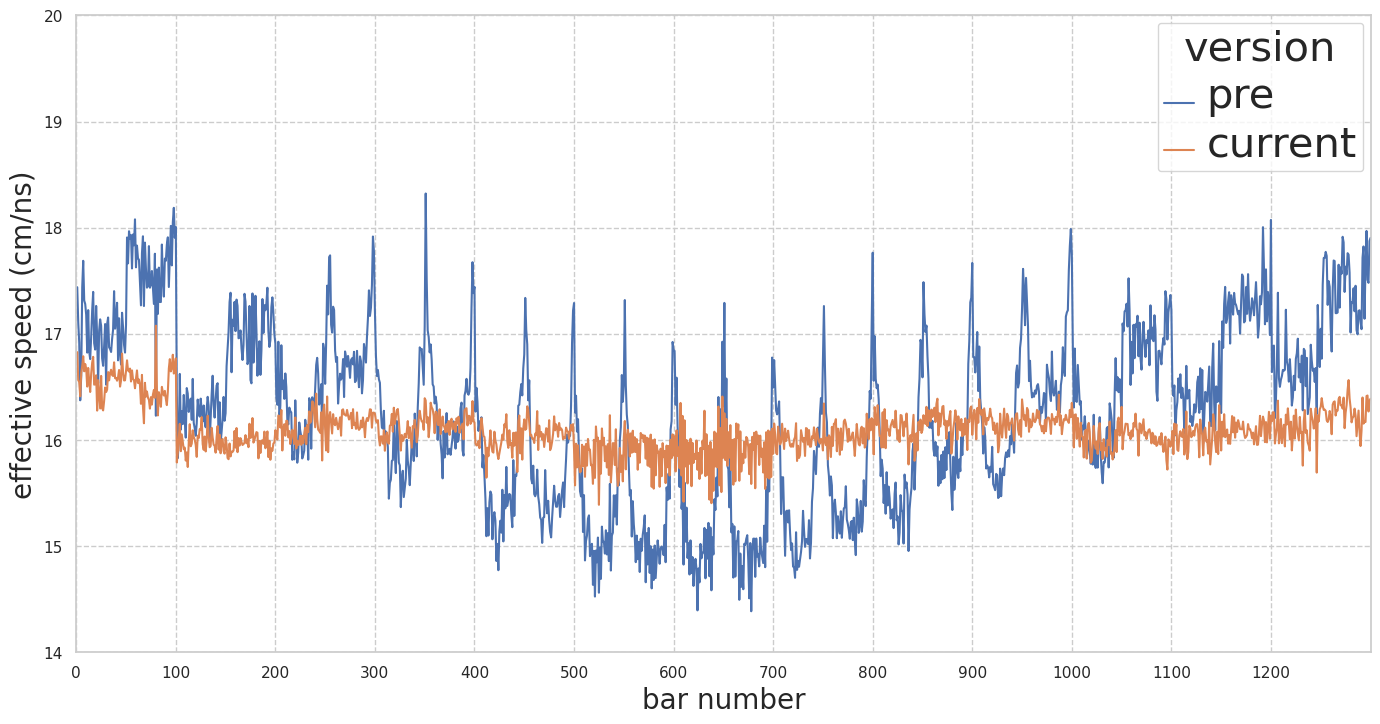

In [184]:
# g = sns.lineplot(data = data_frame, x = "bar_id", y ="effective_speed", hue = "version" )
g = sns.lineplot(data = data_frame[(data_frame["version"] == "pre") | (data_frame["version"] == "current")], x = "bar_id", y ="effective_speed", hue = "version")
xmin = 0
xmax = 1300
sep = 100
g.set(xlim = (xmin, xmax), xticks = (range(xmin, xmax, sep)));
g.set_ylim(14, 20)
g.set_ylabel("effective speed (cm/ns)", fontsize = 20)
g.set_xlabel("bar number", fontsize = 20)
plt.setp(g.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='30')

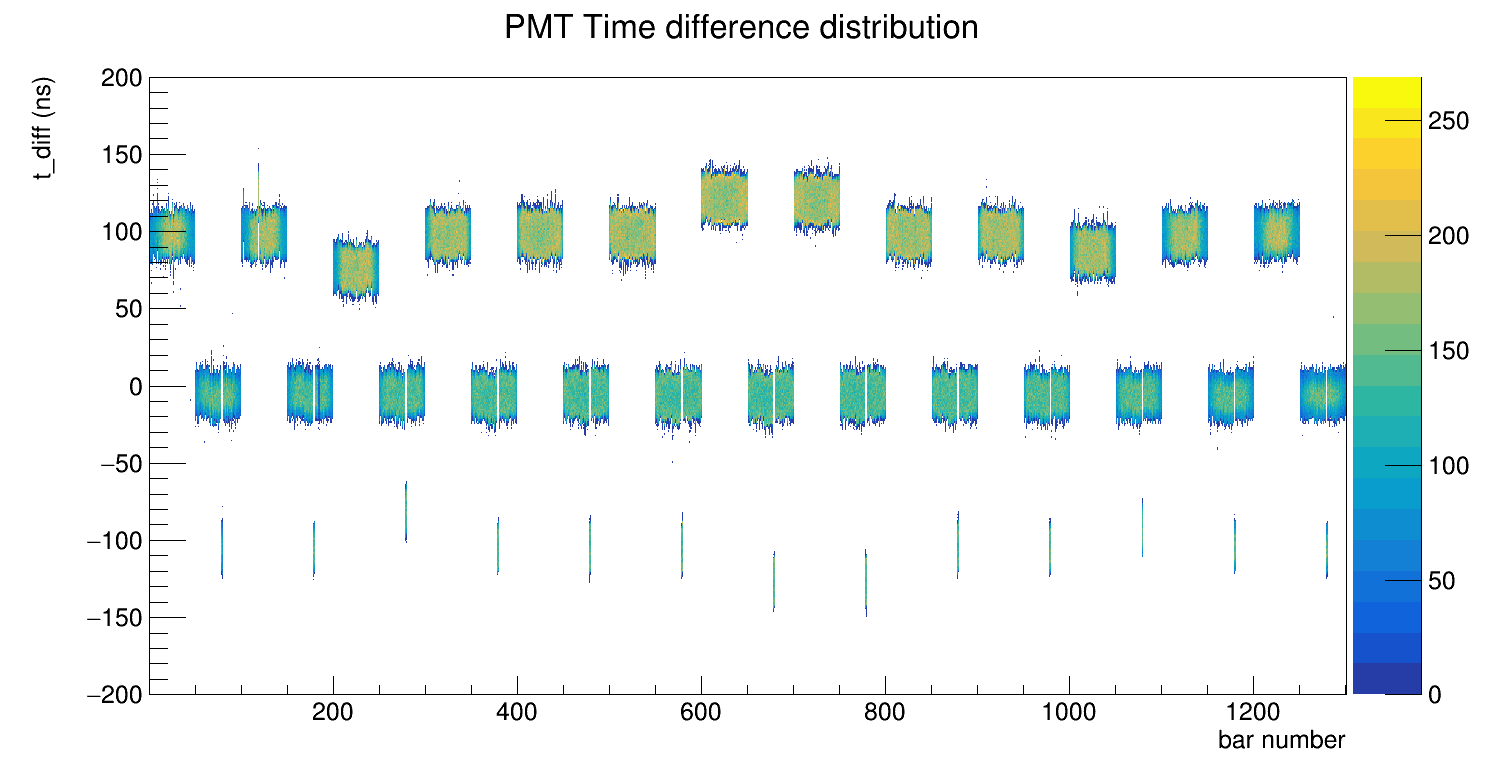

In [128]:
# hist_filename = "/lustre/r3b/ywang/calibration/s515/run49x/millepede/cal.root"
hist_filename = "/lustre/r3b/ywang/exp202402/prebeam/millepede2/cal.root"
hist_file = ROOT.TFile(hist_filename, "read")
hist_folder = hist_file.GetDirectory("HistMonitor/NeulandCal2HitParTask")
hist_time_offsets = hist_folder.Get("hist_time_offsets")
hist_time_offsets.GetYaxis().SetRangeUser(-200, 200)
hist_time_offsets.GetYaxis().SetTitle("t_diff (ns)")
hist_time_offsets.GetXaxis().SetTitle("bar number")
hist_time_offsets.SetTitle("PMT Time difference distribution")
hist_time_offsets.SetStats(0)
hist_time_offsets.Draw("CLOZ")
canvas.Draw()

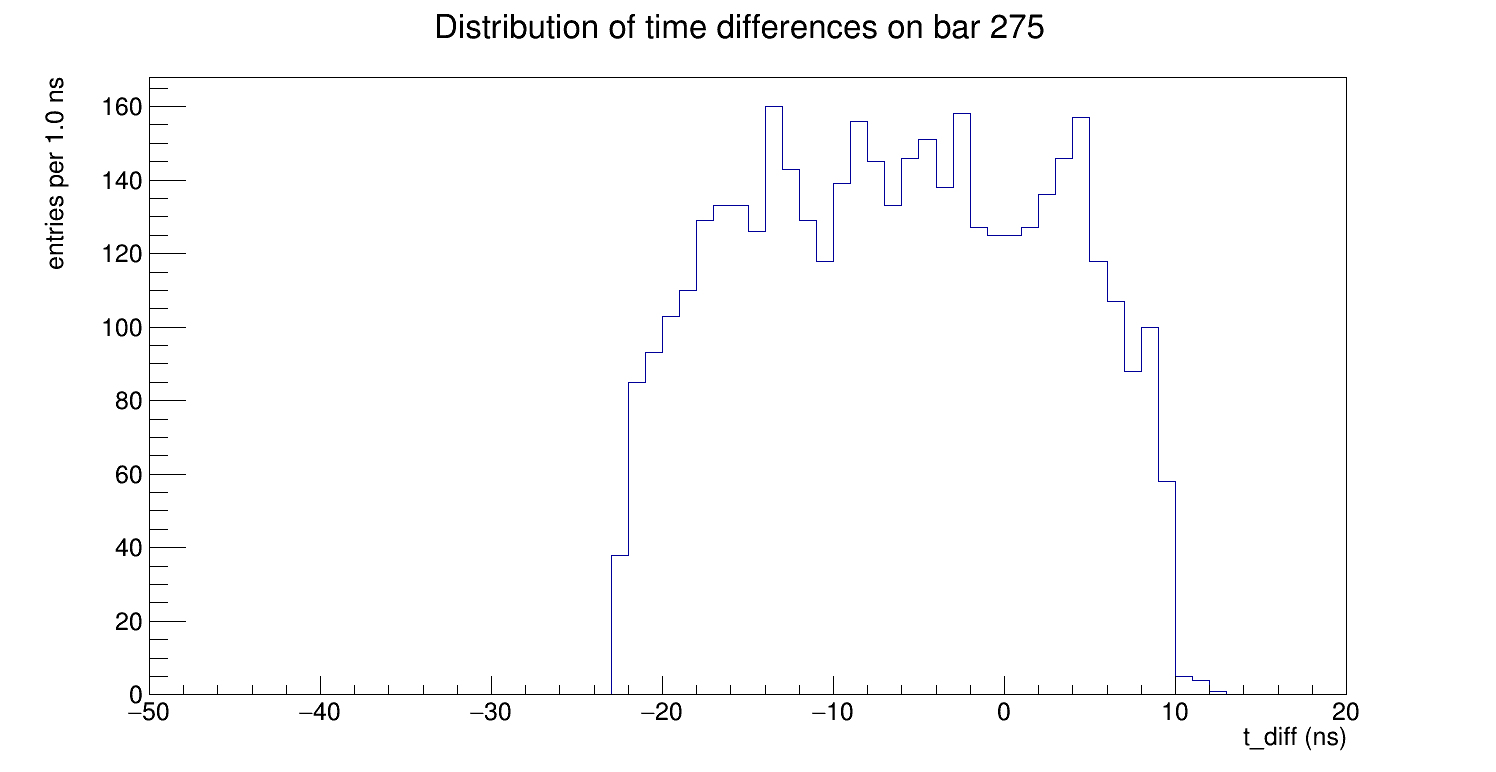

In [129]:
# module_num = 343
# module_num = 254
module_num = 275
hist_module = hist_time_offsets.ProjectionY("_y", module_num, module_num)
hist_module.GetXaxis().SetRangeUser(-50, 20)
hist_module.SetStats(0)
hist_module.SetTitle(f"Distribution of time differences on bar {module_num}")
bin_width = hist_module.GetXaxis().GetBinWidth(1)
hist_module.GetYaxis().SetTitle(f"entries per {bin_width} ns")
hist_module.Draw()
canvas.Draw()

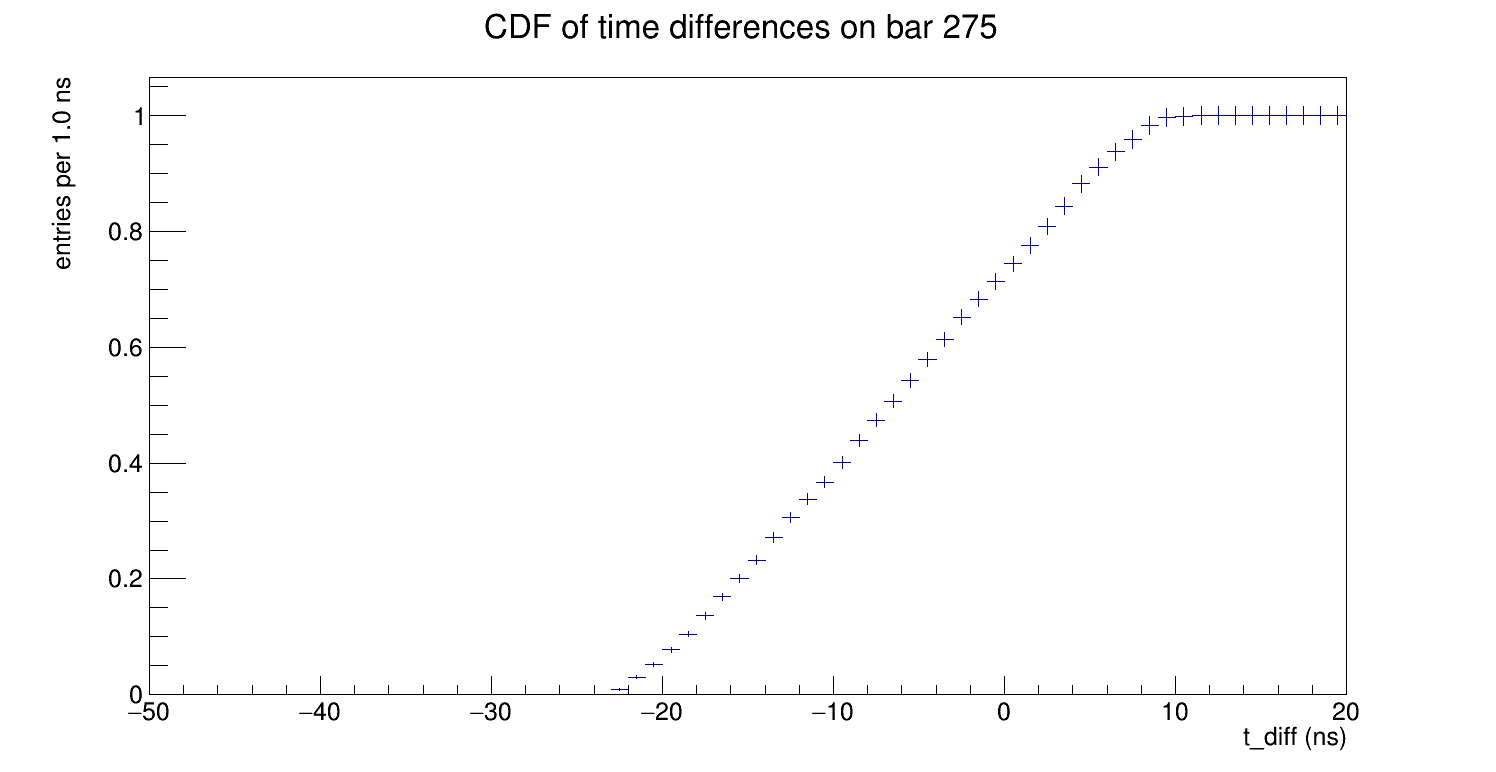

In [131]:
hist_module_scale = hist_module.Clone()
hist_module_scale.Scale(1 / hist_module.GetEntries())
hist_module_int = hist_module_scale.GetCumulative()
hist_module_int.SetTitle(f"CDF of time differences on bar {module_num}")
hist_module_int.GetYaxis().SetTitle(f"entries per {bin_width} ns")
hist_module_int.Draw()
canvas.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      18.9437
NDf                       =           27
p0                        =      0.72313   +/-   0.00310203  
p1                        =    0.0331707   +/-   0.000201066 


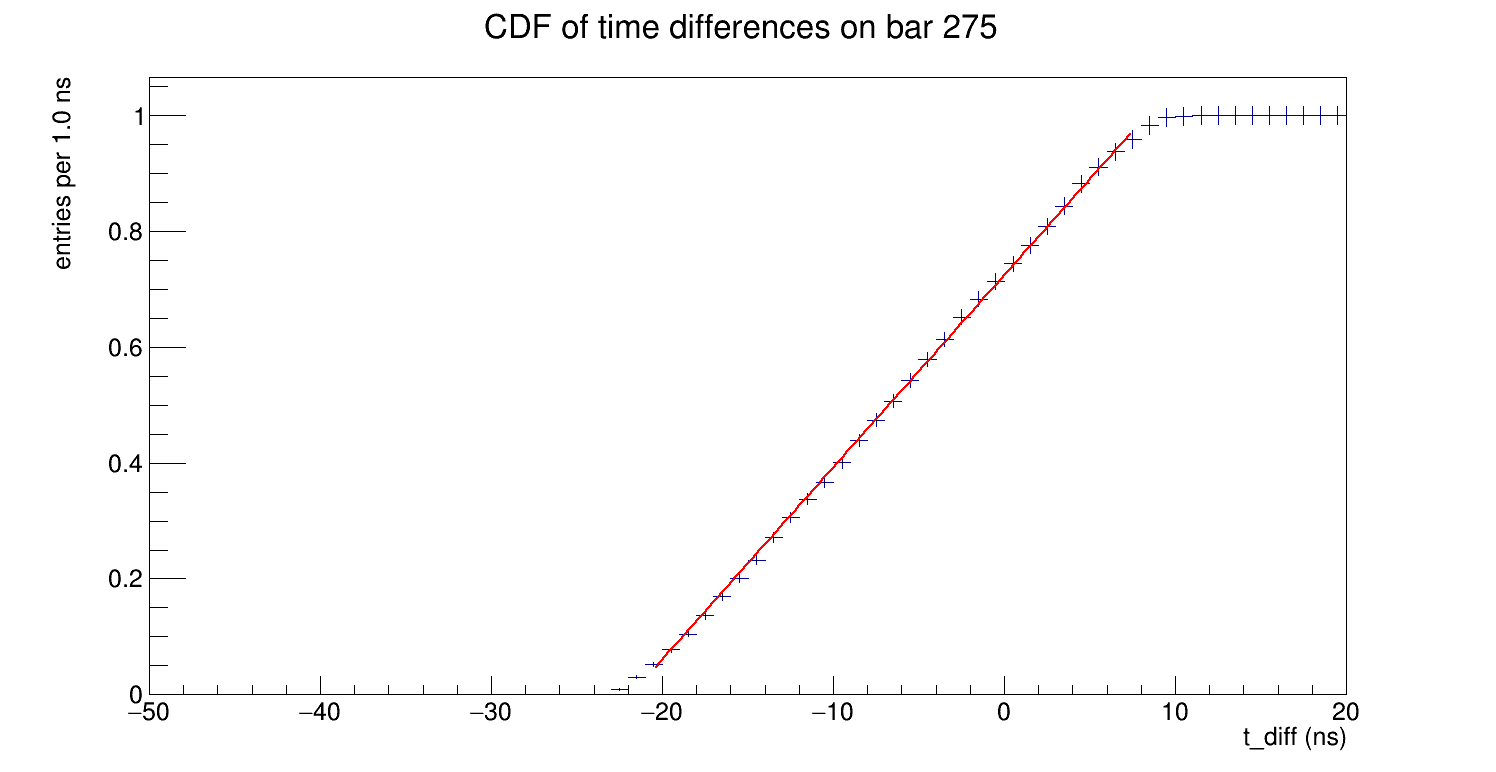

In [132]:
low = hist_module_int.GetBinCenter(hist_module_int.FindFirstBinAbove(0.05))
high = hist_module_int.GetBinCenter(hist_module_int.FindFirstBinAbove(0.95))
hist_module_int.Fit("pol1", "S", "", low, high)
hist_module_int.Draw("*")
canvas.Draw()